In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/kaggle data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sirayanian, Mr. Orsen",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


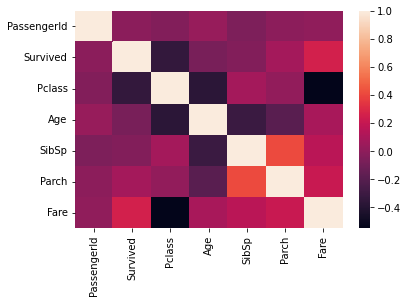

In [ ]:
sns.heatmap(train.corr())

In [ ]:
no_male = len(train[train['Sex'] == 'male'])
print('total male passenger in the titanic is: ', no_male)

no_female = len(train[train['Sex'] == 'female'])
print('total female passenger in the titanic is: ', no_female)

total male passenger in the titanic is:  577
total female passenger in the titanic is:  314


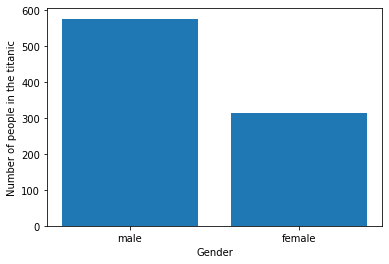

In [ ]:
Sex = ['male', 'female']
index = [577, 314]
plt.bar(Sex,index)
plt.xlabel('Gender')
plt.ylabel('Number of people in the titanic')
plt.show()

In [ ]:
survive = len(train[train['Survived'] == 1])
print('total survived passenger in the titanic is: ', survive)
death = len(train[train['Survived'] == 0])
print('total  death in the titanic is: ', death)

total survived passenger in the titanic is:  342
total  death in the titanic is:  549


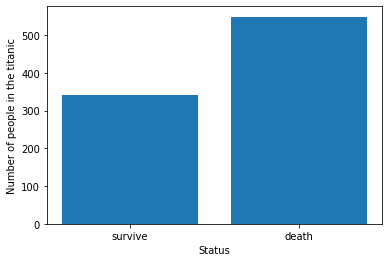

In [ ]:
Status = ['survive', 'death']
index = [342, 549]
plt.bar(Status,index)
plt.xlabel('Status')
plt.ylabel('Number of people in the titanic')
plt.show()

In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
train.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


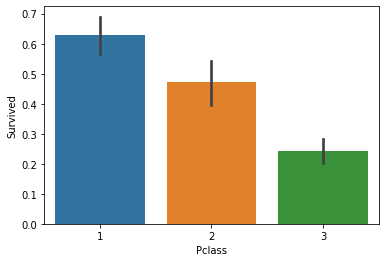

In [ ]:
sns.barplot(x= 'Pclass', y = 'Survived', data = train)

Text(0, 0.5, 'count')

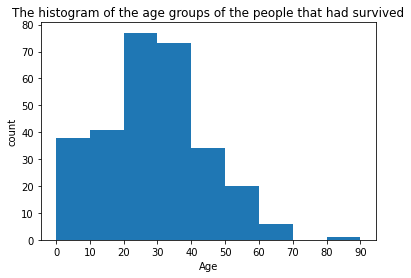

In [ ]:
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.xlabel('Age')
plt.ylabel('count')

Text(0, 0.5, 'count')

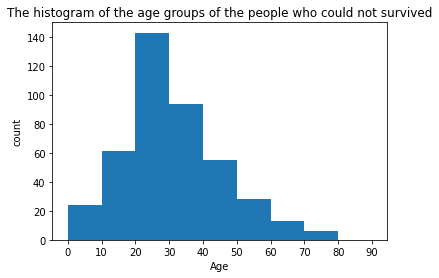

In [ ]:
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people who could not survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))
plt.xlabel('Age')
plt.ylabel('count')

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


([<matplotlib.patches.Wedge at 0x7f776cf11050>,
 [Text(0.25282145556488334, 1.1730649221616227, 'C = Cherbourg'),
  Text(-1.0344005833700955, -0.6082889388469973, 'Q = Queenstown'),
  Text(0.8125674821794541, -0.8830255301544472, 'S = Southampton')],
 [Text(0.1474791824128486, 0.6842878712609465, '43.24%'),
  Text(-0.6034003402992224, -0.3548352143274151, '30.43%'),
  Text(0.4739976979380149, -0.5150982259234276, '26.32%')])

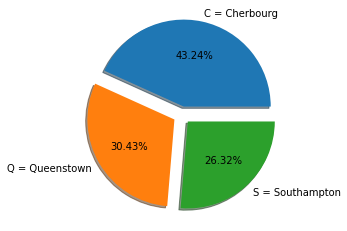

In [ ]:
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
plt.pie(s, autopct='%1.2f%%', shadow=True, explode=(0.1, 0.1, 0.1), labels = l)

In [ ]:
train['Fare'].value_counts().sort_index(ascending= False)

512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
            ..
6.4375       1
6.2375       1
5.0000       1
4.0125       1
0.0000      15
Name: Fare, Length: 248, dtype: int64

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/kaggle data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
test.head(2)

In [ ]:
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


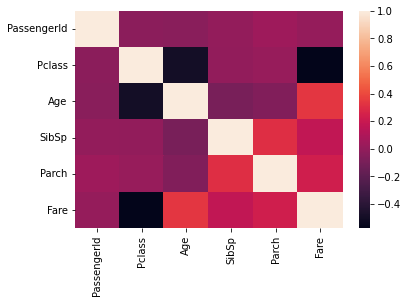

In [ ]:
sns.heatmap(test.corr())

In [ ]:
select_col = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [104]:
X = train[select_col]
y = train['Survived']

In [107]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [108]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [110]:
map={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:map[x])
X['Sex'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [111]:
map1={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:map1[x])
X['Embarked'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [112]:
print(X)

      Age  Pclass  SibSp  Parch     Fare  Sex  Embarked
0    22.0       3      1      0   7.2500    0         2
1    38.0       1      1      0  71.2833    1         0
2    26.0       3      0      0   7.9250    1         2
3    35.0       1      1      0  53.1000    1         2
4    35.0       3      0      0   8.0500    0         2
..    ...     ...    ...    ...      ...  ...       ...
886  27.0       2      0      0  13.0000    0         2
887  19.0       1      0      0  30.0000    1         2
888  28.0       3      1      2  23.4500    1         2
889  26.0       1      0      0  30.0000    0         0
890  32.0       3      0      0   7.7500    0         1

[891 rows x 7 columns]


In [113]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.469,random_state=1)

In [165]:
print(X_train.shape, X_test.shape)

(473, 7) (418, 7)


In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [203]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [204]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [205]:
model.score(X_train,y_train)

0.9894291754756871

In [206]:
model.score(X_test,y_test)

0.7751196172248804

In [207]:
y_pred = model.predict(X_test)
y_pred[::5]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[231  15]
 [ 73  99]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       246
           1       0.87      0.58      0.69       172

    accuracy                           0.79       418
   macro avg       0.81      0.76      0.77       418
weighted avg       0.80      0.79      0.78       418



In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
model1 = GaussianNB()
model1.fit(X_train,y_train)
model1.score(X_test, y_test)

0.7368421052631579

In [176]:
y_pred1 = model1.predict(X_test)
y_pred1[::5]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [177]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
print(classification_report(y_test,y_pred1))

[[195  51]
 [ 59 113]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       246
           1       0.69      0.66      0.67       172

    accuracy                           0.74       418
   macro avg       0.73      0.72      0.73       418
weighted avg       0.74      0.74      0.74       418



In [178]:
from sklearn.svm import SVC

In [179]:
model2 = SVC()
model2.fit(X_train,y_train)
model2.score(X_test, y_test)

0.6483253588516746

In [180]:
y_pred2 = model2.predict(X_test)
y_pred2[::5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [181]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
print(classification_report(y_test,y_pred2))

[[224  22]
 [125  47]]
              precision    recall  f1-score   support

           0       0.64      0.91      0.75       246
           1       0.68      0.27      0.39       172

    accuracy                           0.65       418
   macro avg       0.66      0.59      0.57       418
weighted avg       0.66      0.65      0.60       418



In [208]:
final_result = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'Support Vector Machines',],
    'Score': [0.78, 0.74, 0.65]})

result_df = final_result.sort_values(by='Score', ascending=False)
result_df.head()

,Model,Score
0,Decision Tree,0.78
1,Naive Bayes,0.74
2,Support Vector Machines,0.65


In [211]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
print(output)

     PassengerId  Survived
0            892         1
1            893         0
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         1
417         1309         0

[418 rows x 2 columns]


In [210]:
output.to_csv('hw_submission_two_features.csv', index=False)
print('successfully saved')

successfully saved
